To implement a python program for the classsification of images in the CIFAR-10 dataset using Neural Network.

In [ ]:
# Cell 1: Import libraries (MNIST style)
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

print("TensorFlow version:", tf.__version__)
print("✅ Libraries imported successfully!")


TensorFlow version: 2.19.0
✅ Libraries imported successfully!


In [ ]:
# Cell 2: Load and explore the dataset
# Using TensorFlow Datasets for reliable flower loading
import tensorflow_datasets as tfds

# Download flower dataset (similar to how MNIST is loaded)
print("📥 Loading flower dataset...")

# Load the tf_flowers dataset (5 classes: daisy, dandelion, roses, sunflowers, tulips)
(train_ds, val_ds), info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# Get dataset info
num_classes = info.features['label'].num_classes
class_names = info.features['label'].names

print(f"✅ Dataset loaded successfully!")
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")
print(f"Training samples: {tf.data.experimental.cardinality(train_ds)}")
print(f"Validation samples: {tf.data.experimental.cardinality(val_ds)}")


📥 Loading flower dataset...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.6CCC4N_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
✅ Dataset loaded successfully!
Number of classes: 5
Class names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
Training samples: 2936
Validation samples: 734


In [ ]:
# Cell 3: Data preprocessing (MNIST style)
# Image parameters
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32

def preprocess_data(image, label):
    """Preprocess images (like MNIST normalization)"""
    # Resize image
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    # Normalize pixel values to [0, 1] (like MNIST)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing
train_ds = train_ds.map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE)

# Batch and prefetch (MNIST style optimization)
train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print("✅ Data preprocessing completed!")
print(f"Image shape: ({IMG_HEIGHT}, {IMG_WIDTH}, 3)")
print(f"Batch size: {BATCH_SIZE}")


✅ Data preprocessing completed!
Image shape: (64, 64, 3)
Batch size: 32


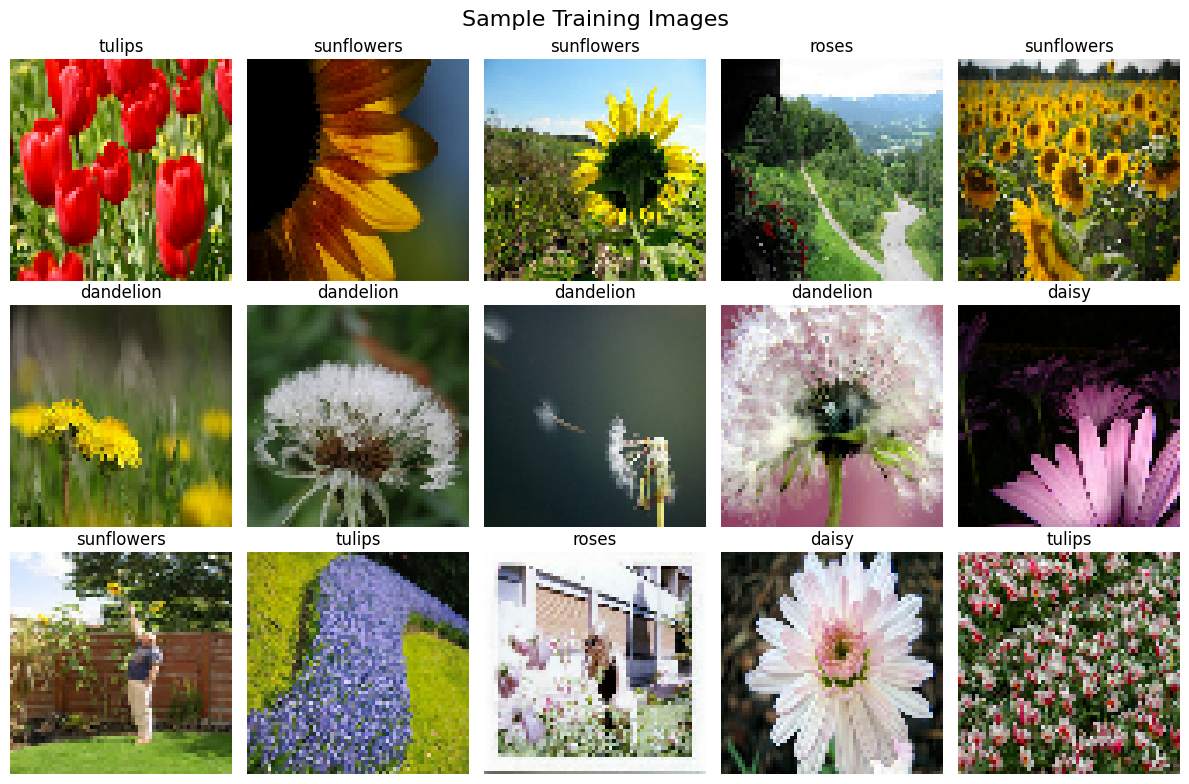

✅ Sample visualization completed!


In [ ]:
# Cell 4: Visualize sample data (like MNIST visualization)
plt.figure(figsize=(12, 8))

# Take a batch of data
for images, labels in train_ds.take(1):
    for i in range(min(15, len(images))):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'{class_names[labels[i]]}')
        plt.axis('off')

plt.suptitle('Sample Training Images', fontsize=16)
plt.tight_layout()
plt.show()

print("✅ Sample visualization completed!")


In [ ]:
# Cell 5: Build the model (MNIST style architecture)
print("🏗️ Building neural network model...")

model = models.Sequential([
    # Flatten layer (like MNIST)
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    # Dense layers (similar to MNIST but larger for color images)
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    # Output layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile model (MNIST style)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Note: sparse (like MNIST)
    metrics=['accuracy']
)

print("✅ Model built successfully!")
model.summary()


🏗️ Building neural network model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model built successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,456,837 (24.63 MB)

 Trainable params: 6,456,837 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Cell 6: Train the model (MNIST style training)
print("🚀 Starting model training...")

# Training parameters (MNIST style)
EPOCHS = 10

# Train the model
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    verbose=1
)

print("🎉 Training completed!")


🚀 Starting model training...
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.2192 - loss: 4.1914 - val_accuracy: 0.2616 - val_loss: 1.5892
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2641 - loss: 1.5944 - val_accuracy: 0.2779 - val_loss: 1.5592
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2774 - loss: 1.5734 - val_accuracy: 0.2684 - val_loss: 1.5282
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2586 - loss: 1.5563 - val_accuracy: 0.2166 - val_loss: 1.5492
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2569 - loss: 1.5629 - val_accuracy: 0.2793 - val_loss: 1.5063
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2564 - loss: 1.5890 - val_accuracy: 0.2139 - val_loss: 1.5596
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2445 - loss: 1.5915 - val_accuracy: 0.2166 - val_loss: 1.5896
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2450 - loss: 1.5828 - v

📊 Evaluating model performance...

🎯 FINAL RESULTS:
Validation Accuracy: 0.2139 (21.39%)
Validation Loss: 1.5519


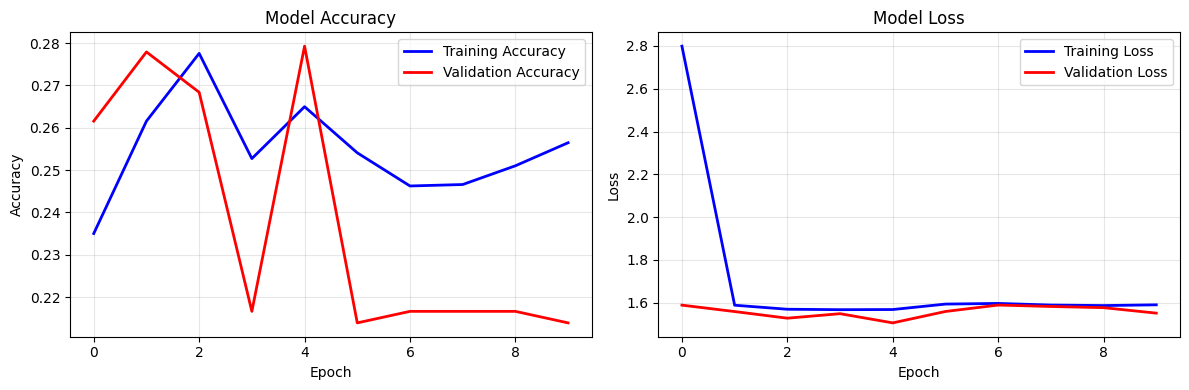

✅ Evaluation completed!


In [ ]:
# Cell 7: Evaluate model (MNIST style evaluation)
print("📊 Evaluating model performance...")

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_ds, verbose=0)

print(f"\n🎯 FINAL RESULTS:")
print(f"Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"Validation Loss: {val_loss:.4f}")

# Plot training history (MNIST style plots)
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Evaluation completed!")


🔮 Testing model predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


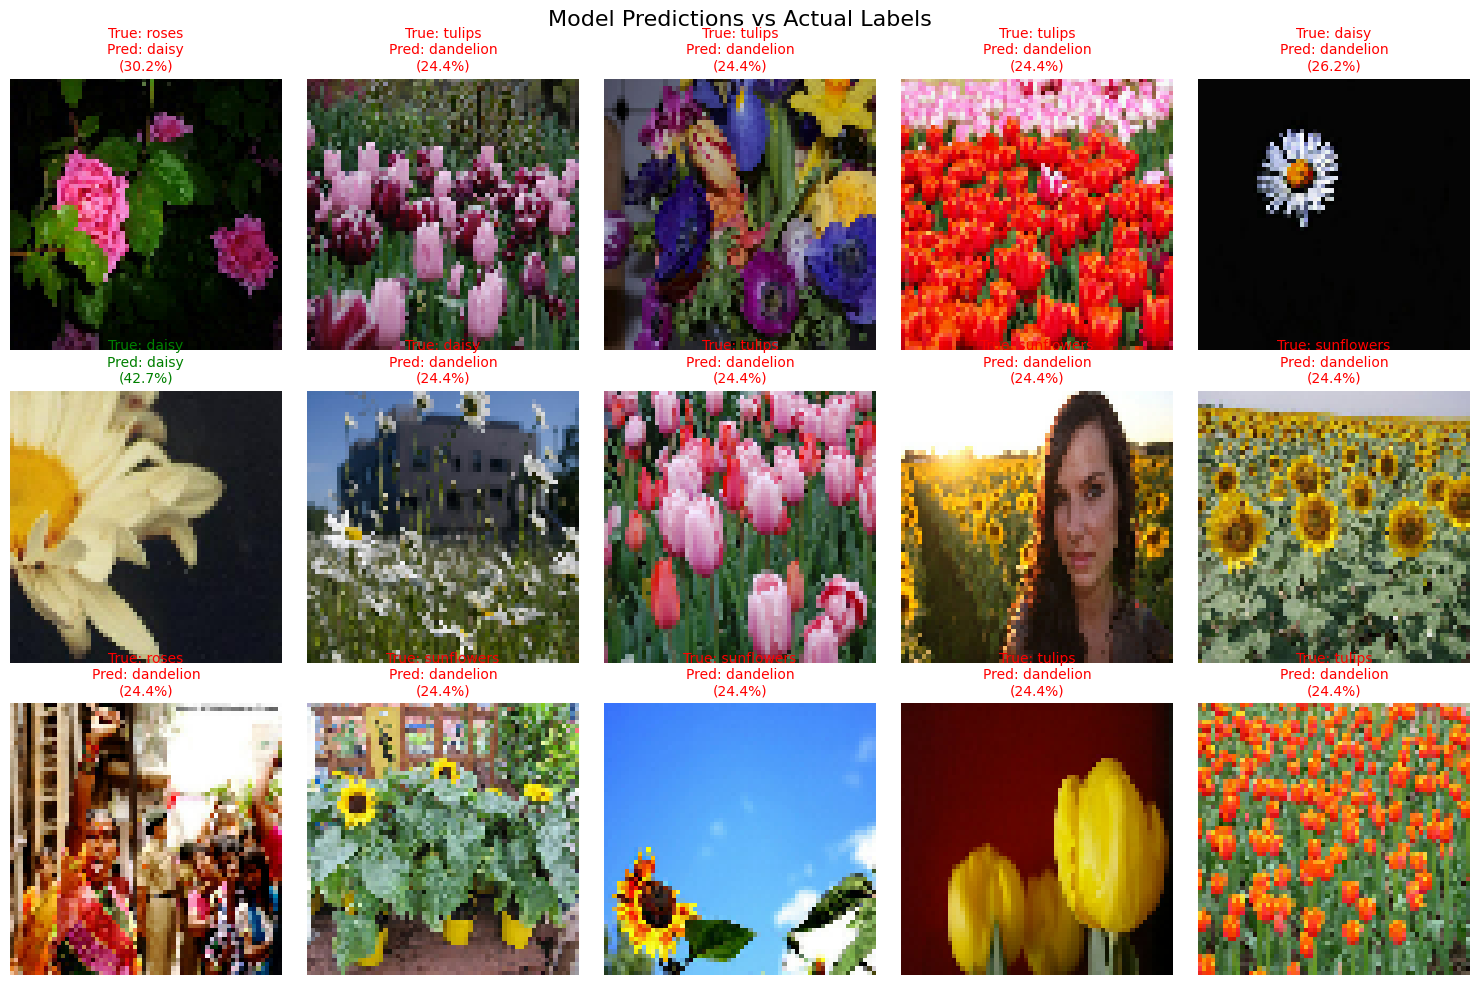

Batch accuracy: 0.156 (5/32)
✅ Prediction testing completed!


In [ ]:
# Cell 8: Make predictions (MNIST style predictions)
print("🔮 Testing model predictions...")

# Get a batch of test images
for test_images, test_labels in val_ds.take(1):
    # Make predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Visualize predictions
    plt.figure(figsize=(15, 10))

    for i in range(min(15, len(test_images))):
        plt.subplot(3, 5, i + 1)
        plt.imshow(test_images[i])

        # Get actual and predicted labels
        actual_label = class_names[test_labels[i]]
        predicted_label = class_names[predicted_classes[i]]
        confidence = np.max(predictions[i]) * 100

        # Color code: green if correct, red if wrong
        color = 'green' if test_labels[i] == predicted_classes[i] else 'red'

        plt.title(f'True: {actual_label}\nPred: {predicted_label}\n({confidence:.1f}%)',
                 color=color, fontsize=10)
        plt.axis('off')

    plt.suptitle('Model Predictions vs Actual Labels', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Calculate accuracy for this batch
    correct = np.sum(test_labels.numpy() == predicted_classes)
    total = len(test_labels)
    batch_accuracy = correct / total
    print(f"Batch accuracy: {batch_accuracy:.3f} ({correct}/{total})")

    break

print("✅ Prediction testing completed!")
